<a href="https://colab.research.google.com/github/phamvandatspkt/nhandangmonan/blob/main/Breast_cancer_note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>> # ENTRO

 # Breast Cancer Detection using deep learning


Detection of breast cancer on screening mammography is challenging as an image classification task because the tumors themselves occupy only a small portion of the image of the entire breast. For example, a full-field digital mammography (FFDM) image is typically 4000 × 3000 pixels while a potentially cancerous region of interest (ROI) can be as small as 100 × 100 pixels.



 This explains the large number that we have in the data, which is more than **a quarter of a million** images!

In [ ]:
##

>> # CODE

> # Import  Libraries 

In [ ]:
import os
import numpy as np
import shutil
import pandas as pd
from skimage.util import random_noise
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt
from skimage.filters import gaussian
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools


> #  Get & Adjust Data

In [ ]:

# accsess the data files
cancer_rays_dir     = os.listdir("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\breasthostopathologyimagesdataset\\") 
all_rays_dir        = "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\allraysdir"
cancer_rays_dir_str ="C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\breasthostopathologyimagesdataset\\"

### what is the structure of our data?

In [ ]:
print(cancer_rays_dir)
print(len(cancer_rays_dir))

['16534', '16550', '16555', '16568', '16569', '16570', '16895', '16896']
8


##### We can see 8 files for each patient named with their id, and each file contains x-ray images of its owner

### To facilitate the process of dealing with screening mammograms images, we will collect all the images in one place, while retaining ownership of each image and its class as well...

In [ ]:

all_rays_dir_lst = os.listdir(all_rays_dir)

In [ ]:
os.listdir(all_rays_dir)

['16534_idx5_x1001_y1001_class0.png',
 '16534_idx5_x101_y101_class1.png',
 '16534_idx5_x1051_y1151_class0.png',
 '16534_idx5_x1101_y1101_class0.png',
 '16534_idx5_x1101_y1151_class0.png',
 '16534_idx5_x1201_y651_class0.png',
 '16534_idx5_x1251_y651_class0.png',
 '16534_idx5_x151_y101_class1.png',
 '16534_idx5_x151_y201_class1.png',
 '16534_idx5_x201_y101_class1.png',
 '16534_idx5_x201_y201_class1.png',
 '16534_idx5_x201_y251_class0.png',
 '16534_idx5_x201_y701_class1.png',
 '16534_idx5_x251_y151_class1.png',
 '16534_idx5_x251_y201_class1.png',
 '16534_idx5_x251_y251_class1.png',
 '16534_idx5_x251_y301_class1.png',
 '16534_idx5_x251_y701_class1.png',
 '16534_idx5_x251_y751_class1.png',
 '16534_idx5_x251_y801_class1.png',
 '16534_idx5_x301_y201_class1.png',
 '16534_idx5_x301_y251_class1.png',
 '16534_idx5_x301_y301_class1.png',
 '16534_idx5_x301_y351_class1.png',
 '16534_idx5_x301_y401_class1.png',
 '16534_idx5_x301_y701_class1.png',
 '16534_idx5_x301_y751_class1.png',
 '16534_idx5_x301_

In [ ]:
for patient in cancer_rays_dir:   
    path_0 = cancer_rays_dir_str + str(patient) +  '/0'
    path_1 = cancer_rays_dir_str + str(patient) +  '/1'
    file_list_0 = os.listdir(path_0)   
    file_list_1 = os.listdir(path_1)
    for fname in file_list_0:
            src = os.path.join(path_0, fname)
            dst = os.path.join(all_rays_dir, fname)
            shutil.copyfile(src, dst)
    for fname in file_list_1:
        src = os.path.join(path_1, fname)
        dst = os.path.join(all_rays_dir, fname)
        shutil.copyfile(src, dst)

In [ ]:
len(all_rays_dir_lst)

6125

##### Now we have 1127 images, what a number!

### Then, it's time to put images in a data_frame for easy access:

In [ ]:
data=pd.DataFrame(list(all_rays_dir_lst),columns=['image_id'])
data.head

<bound method NDFrame.head of                                image_id
0     16534_idx5_x1001_y1001_class0.png
1       16534_idx5_x101_y101_class1.png
2     16534_idx5_x1051_y1151_class0.png
3     16534_idx5_x1101_y1101_class0.png
4     16534_idx5_x1101_y1151_class0.png
...                                 ...
6120    16896_idx5_x951_y751_class0.png
6121    16896_idx5_x951_y801_class0.png
6122    16896_idx5_x951_y851_class0.png
6123    16896_idx5_x951_y901_class0.png
6124    16896_idx5_x951_y951_class0.png

[6125 rows x 1 columns]>

In [ ]:
print(data)


                               image_id
0     16534_idx5_x1001_y1001_class0.png
1       16534_idx5_x101_y101_class1.png
2     16534_idx5_x1051_y1151_class0.png
3     16534_idx5_x1101_y1101_class0.png
4     16534_idx5_x1101_y1151_class0.png
...                                 ...
6120    16896_idx5_x951_y751_class0.png
6121    16896_idx5_x951_y801_class0.png
6122    16896_idx5_x951_y851_class0.png
6123    16896_idx5_x951_y901_class0.png
6124    16896_idx5_x951_y951_class0.png

[6125 rows x 1 columns]


In [ ]:
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

data['target'] = data['image_id'].apply(extract_target)

data.head(10)

,image_id,target
0,16534_idx5_x1001_y1001_class0.png,0
1,16534_idx5_x101_y101_class1.png,1
2,16534_idx5_x1051_y1151_class0.png,0
3,16534_idx5_x1101_y1101_class0.png,0
4,16534_idx5_x1101_y1151_class0.png,0
5,16534_idx5_x1201_y651_class0.png,0
6,16534_idx5_x1251_y651_class0.png,0
7,16534_idx5_x151_y101_class1.png,1
8,16534_idx5_x151_y201_class1.png,1
9,16534_idx5_x201_y101_class1.png,1


In [ ]:
def extract_patient_id(x):
    # split into a list
    a = x.split('_')
    patient_id = a[0]
    
    return patient_id
data['patient_id'] = data['image_id'].apply(extract_patient_id)
data.head()

,image_id,target,patient_id
0,16534_idx5_x1001_y1001_class0.png,0,16534
1,16534_idx5_x101_y101_class1.png,1,16534
2,16534_idx5_x1051_y1151_class0.png,0,16534
3,16534_idx5_x1101_y1101_class0.png,0,16534
4,16534_idx5_x1101_y1151_class0.png,0,16534


In [ ]:
data['target'].value_counts()

0    4805
1    1320
Name: target, dtype: int64

#### It also seems that the number of healthy rays is greater than the number of infected rays, good news!

> # Exploratory Data Analysis

#### First of all, let's take a look at the nature of the mammograms...

## Healthy patches:


C:\Users\Pham Van Dat\AppData\Local\Temp\ipykernel_1424\3337501421.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.target = data.target.astype(np.int)


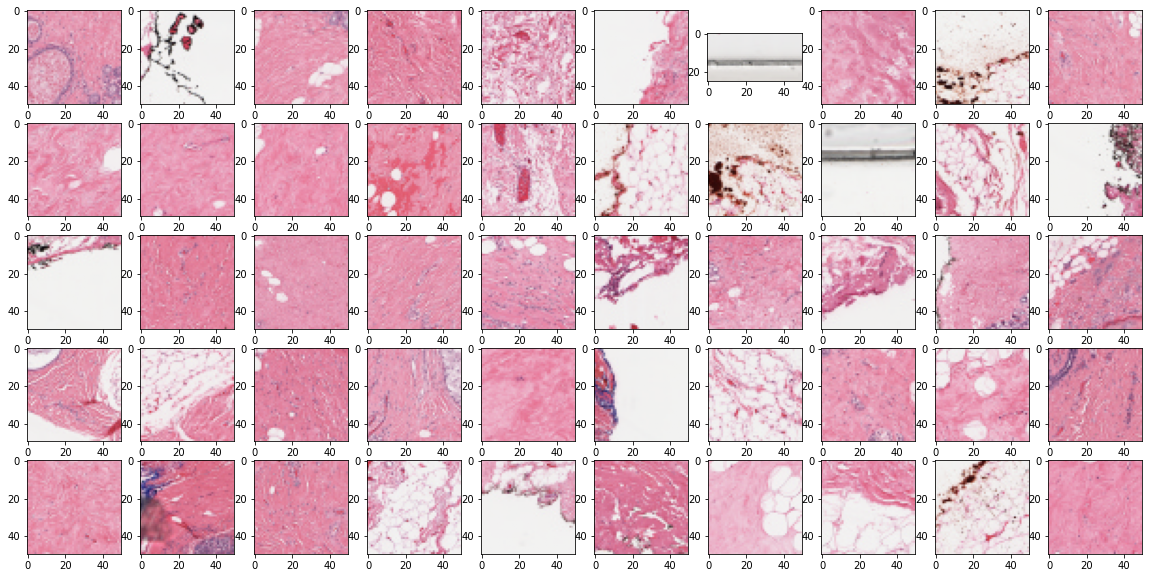

In [ ]:
data.target = data.target.astype(np.int)
fig, ax = plt.subplots(5,10,figsize=(20,10))
pos_selection = np.random.choice(data[data.target ==1].index, size=50, replace=False,)
neg_selection = np.random.choice(data[data.target ==0].index, size=50, replace=False,)
for n in range(5):
    for m in range(10):
        idx = neg_selection[m + 10*n]
        path =os.path.join(all_rays_dir,data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)




### Insights
- Most of the mammograms are light pink, but there are some dark ones too

# Cancer patches:

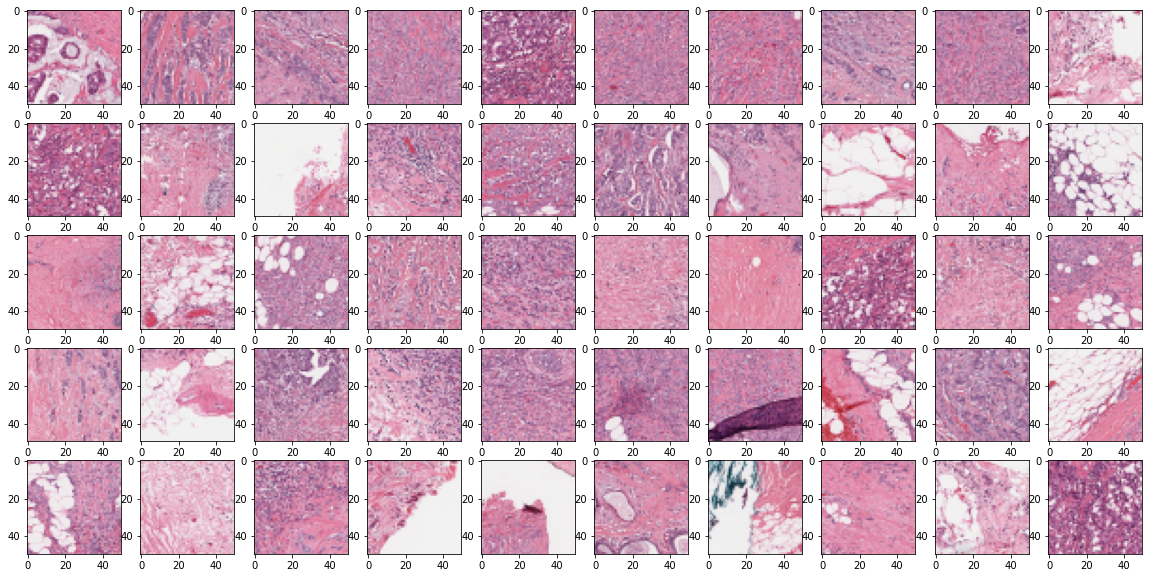

In [ ]:
fig, ax = plt.subplots(5,10,figsize=(20,10))
for n in range(5):
    for m in range(10):
        idx = pos_selection[m + 10*n]
        path =os.path.join(all_rays_dir,data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)


### Insights

- Patches with cancer look more violet and crowded than healthy ones. 
- In fact, we could not determine the actual difference between the two types with the naked eye, but I think that the model is able to detect hidden patterns in these images that enable us to determine the state of each image.

### Let's ask some questions that will help us get to know more our data:
- do all patients have the same number of mammograms?
- what is the percentage of cancer (IDC) that each mammogram shows? 
- how many healthy and cancered mammograms are in the data?

c:\Users\Pham Van Dat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Pham Van Dat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


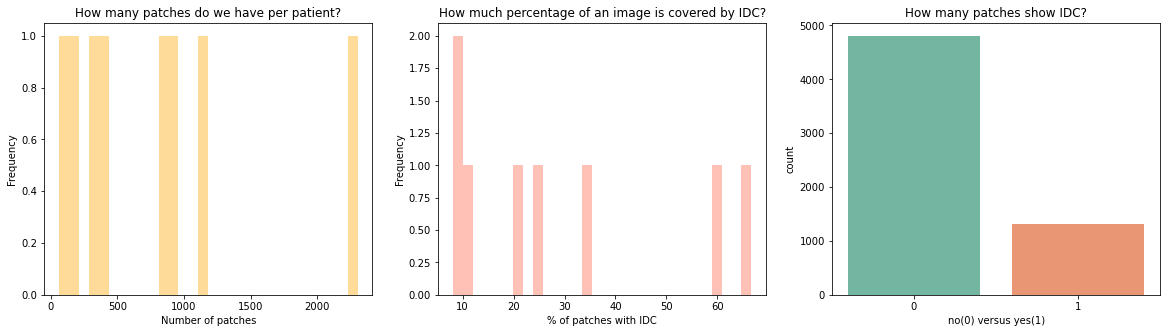

In [ ]:
cancer_perc = data.groupby("patient_id").target.value_counts()/ data.groupby("patient_id").target.size()
cancer_perc = cancer_perc.unstack()

fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(data.groupby("patient_id").size(), ax=ax[0], color="Orange", kde=False, bins=30)
ax[0].set_xlabel("Number of patches")
ax[0].set_ylabel("Frequency");
ax[0].set_title("How many patches do we have per patient?");
sns.distplot(cancer_perc.loc[:, 1]*100, ax=ax[1], color="Tomato", kde=False, bins=30)
ax[1].set_title("How much percentage of an image is covered by IDC?")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("% of patches with IDC");
sns.countplot(data.target, palette="Set2", ax=ax[2]);
ax[2].set_xlabel("no(0) versus yes(1)")
ax[2].set_title("How many patches show IDC?");

### Insights:
- The number of image patches per patient varies a lot
- Most of the photos have a percentage that is not large, but there are other photos that have a percentage of up to 80%
- the smaller number of mammograms had cancer

In [ ]:
def extract_coords(df):
    coord = df.path.str.rsplit("_", n=4, expand=True)
    coord = coord.drop([0, 1, 4], axis=1)
    coord = coord.rename({2: "x", 3: "y"}, axis=1)
    coord.loc[:, "x"] = coord.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    coord.loc[:, "y"] = coord.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    df.loc[:, "x"] = coord.x.values
    df.loc[:, "y"] = coord.y.values
    return df

In [ ]:

def get_cancer_dataframe(patient_id, cancer_id):
    path = cancer_rays_dir_str + patient_id + "/" + cancer_id
    files = os.listdir(path)
    dataframe = pd.DataFrame(files, columns=["filename"])
    path_names = path + "/" + dataframe.filename.values
    dataframe = dataframe.filename.str.rsplit("_", n=4, expand=True)
    dataframe.loc[:, "target"] = np.int(cancer_id)
    dataframe.loc[:, "path"] = path_names
    dataframe = dataframe.drop([0, 1, 4], axis=1)
    dataframe = dataframe.rename({2: "x", 3: "y"}, axis=1)
    dataframe.loc[:, "x"] = dataframe.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    dataframe.loc[:, "y"] = dataframe.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    return dataframe


In [ ]:
def get_patient_dataframe(patient_id):
    df_0 = get_cancer_dataframe(patient_id, "0")
    df_1 = get_cancer_dataframe(patient_id, "1")
    patient_df = df_0.append(df_1)
    return patient_df

### Well let's take a closer look at the shape of the patches and their distribution in each mammogram using Binary objective visualization for each tissue slice:

C:\Users\Pham Van Dat\AppData\Local\Temp\ipykernel_1424\892834864.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataframe.loc[:, "target"] = np.int(cancer_id)
C:\Users\Pham Van Dat\AppData\Local\Temp\ipykernel_1424\892834864.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

IndexError: index 8 is out of bounds for axis 0 with size 8

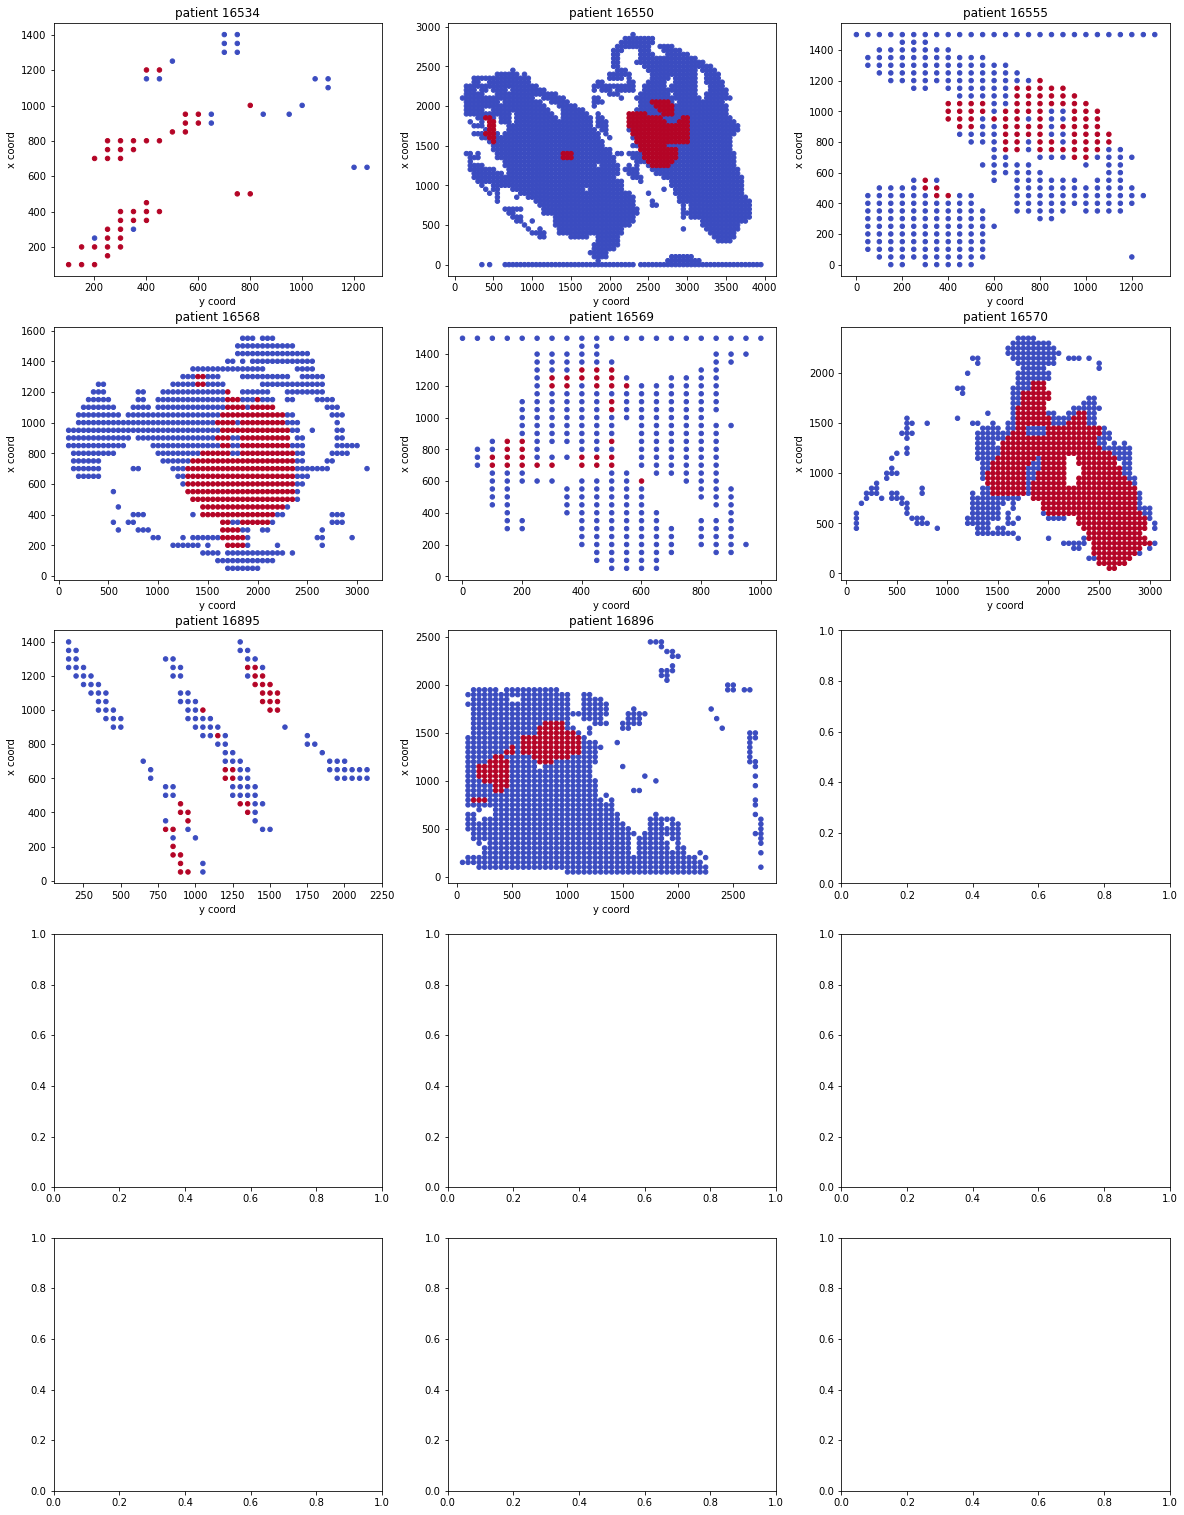

In [ ]:
fig, ax = plt.subplots(5,3,figsize=(20, 27))

patient_ids = data.patient_id.unique()

for n in range(5):
    for m in range(3):
        patient_id = patient_ids[m + 3*n]
        example_df = get_patient_dataframe(patient_id)
        
        ax[n,m].scatter(example_df.x.values, example_df.y.values, c=example_df.target.values, cmap="coolwarm", s=20);
        ax[n,m].set_title("patient " + patient_id)
        ax[n,m].set_xlabel("y coord")
        ax[n,m].set_ylabel("x coord")

### Insights:

- We see a large variation in the concentration of cells
- Sometimes we don't have the full tissue information. It seems that tissue patches have been discarded or lost during preparation.

> # Processing and selection
it's time to work on our data..

# Image Processing 

-  Apply some processing properties

C:\Users\Pham Van Dat\AppData\Local\Temp\ipykernel_1424\1235503615.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.target = data.target.astype(np.int)


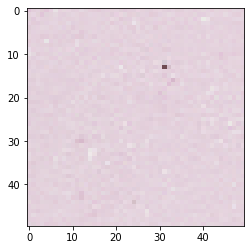

In [ ]:
data.target = data.target.astype(np.int)
random_image_path = np.random.choice(data[data.target ==0].index, size=1, replace=False,)
path =os.path.join(all_rays_dir,data.loc[random_image_path[0], 'image_id'])
image = mpimg.imread(path)
plt.imshow(image)

c:\Users\Pham Van Dat\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


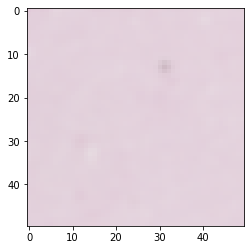

In [ ]:
gaussian_image = gaussian(image)
plt.imshow(gaussian_image)

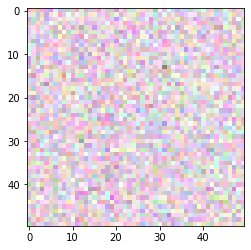

In [ ]:
noise_image = random_noise(image)
plt.imshow(noise_image)

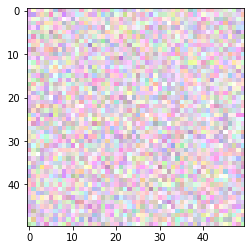

In [ ]:
noise_gaussian_image = random_noise(gaussian_image)
plt.imshow(noise_gaussian_image)

-  Processing using [random_noise] function

In [ ]:
os.mkdir("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\")
os.mkdir("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\noiseimages\\")


In [ ]:
for normal_image in all_rays_dir_lst :
    path        = all_rays_dir+'\\'+ normal_image
    img         = mpimg.imread( path ,0)
    noise_image = random_noise(img)
    fname       = normal_image
    new_path    = os.path.join("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\noiseimages\\",fname)
    mpimg.imsave(new_path, noise_image)
    

In [ ]:
os.mkdir("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\processddatatrain\\zeros\\")
os.mkdir( "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\processddatatrain\\ones\\")
os.mkdir("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\processddatatest\\zeros\\")
os.mkdir("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\processddatatest\\ones\\")


In [ ]:
processd_lst = os.listdir("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\noiseimages\\")
processd_lst_str = "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\noiseimages\\"
processd_data = pd.DataFrame(processd_lst, columns=['image_id'])
processd_data.head()

,image_id
0,16534_idx5_x1001_y1001_class0.png
1,16534_idx5_x101_y101_class1.png
2,16534_idx5_x1051_y1151_class0.png
3,16534_idx5_x1101_y1101_class0.png
4,16534_idx5_x1101_y1151_class0.png


In [ ]:
processd_lst = os.listdir("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\processddatatrain\\")
processd_lst_str = "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\processddatatrain\\"
processd_data = pd.DataFrame(processd_lst, columns=['image_id'])
processd_data.head()

In [ ]:
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

processd_data['target'] = processd_data['image_id'].apply(extract_target)

processd_data.head(10)

,image_id,target
0,16534_idx5_x1001_y1001_class0.png,0
1,16534_idx5_x101_y101_class1.png,1
2,16534_idx5_x1051_y1151_class0.png,0
3,16534_idx5_x1101_y1101_class0.png,0
4,16534_idx5_x1101_y1151_class0.png,0
5,16534_idx5_x1201_y651_class0.png,0
6,16534_idx5_x1251_y651_class0.png,0
7,16534_idx5_x151_y101_class1.png,1
8,16534_idx5_x151_y201_class1.png,1
9,16534_idx5_x201_y101_class1.png,1


In [ ]:
processd_data['target'].value_counts()

0    4805
1    1320
Name: target, dtype: int64

In [ ]:
 target = processd_data['target']

In [ ]:
for image_id in processd_data:
    fname =  image_id
    target = processd_data['target']
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(processd_lst_str, fname)
    dst = os.path.join( "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\processddatatest\\", label, fname)
    shutil.copyfile(src, dst)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
processd_data.set_index('image_id', inplace=True)
for image in processd_train:
    fname  = image
    target = data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(processd_lst_str, fname)
    dst = os.path.join("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\processddatatrain\\", label, fname)
    shutil.copyfile(src, dst)

KeyError: "None of ['image_id'] are in the columns"

In [ ]:
print(len(os.listdir("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\processddatatrain\\zeros\\")))
print(len(os.listdir("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\processddatatrain\\ones\\")))
print(len(os.listdir("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\processddatatest\\zeros\\")))
print(len(os.listdir("C:\\Users\\Pham Van Dat\Desktop\\finalproj\\imageprocessing\\processddatatest\\ones")))

0
0
0
0


# Processing  and Normal test

-  the images we processed and the noraml are tested on the same model to see which the best in the accuracy

-  A small sample is taken for testing (20,000) images

### First: the processed images

In [ ]:
os.mkdir( "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\modeltst\\trainig\\zeros\\")
os.mkdir( "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\modeltst\\trainig\\ones\\")
os.mkdir( "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\modeltst\\testing\\zeros\\")
os.mkdir( "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\modeltst\\testing\\ones\\")

In [ ]:
df_0 = processd_data[processd_data['target'] == '0'].sample(1000, random_state=101)
df_1 = processd_data[processd_data['target'] == '1'].sample(1000, random_state=101)
test_data =pd.DataFrame(data)
test_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
test_y = test_data['target']
test_data_train, test_data_test = train_test_split(test_data, test_size=0.10, random_state=101, stratify=test_y)
sts_train = test_data_train.image_id
tst_test  = test_data_test.image_id
test_data.set_index('image_id', inplace=True)
for image in sts_train:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\modeltst\\trainig\\", label, fname)
    shutil.copyfile(src, dst)
for image in tst_test:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\modeltst\\testing\\", label, fname)
    shutil.copyfile(src, dst)    


C:\Users\Pham Van Dat\AppData\Local\Temp\ipykernel_1424\2962005536.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  processd_data.target = processd_data.target.astype(np.int)


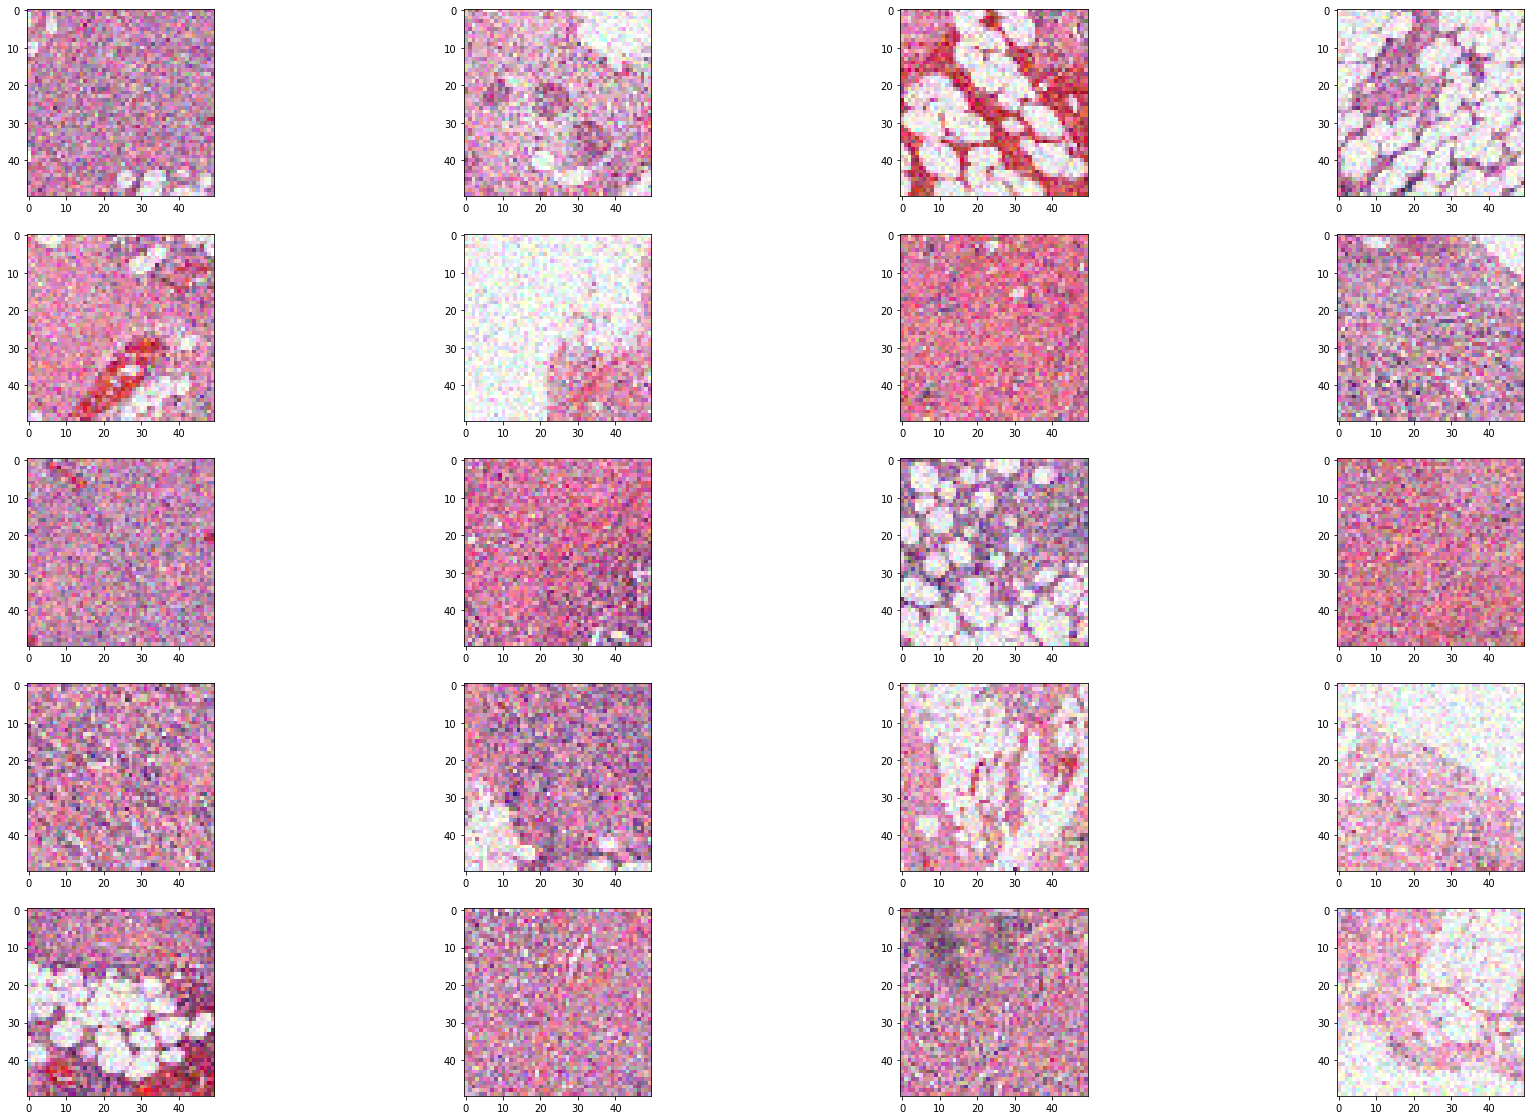

In [ ]:
processd_data.target = processd_data.target.astype(np.int)
fig, ax = plt.subplots(5,4,figsize=(30,20))
pos_selection = np.random.choice(processd_data[processd_data.target==1].index.values, size=20, replace=False)
neg_selection = np.random.choice(processd_data[processd_data.target==0].index.values, size=20, replace=False)
for n in range(5):
    for m in range(4):
        idx = pos_selection[m + 4*n]
        path =os.path.join(processd_lst_str,processd_data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

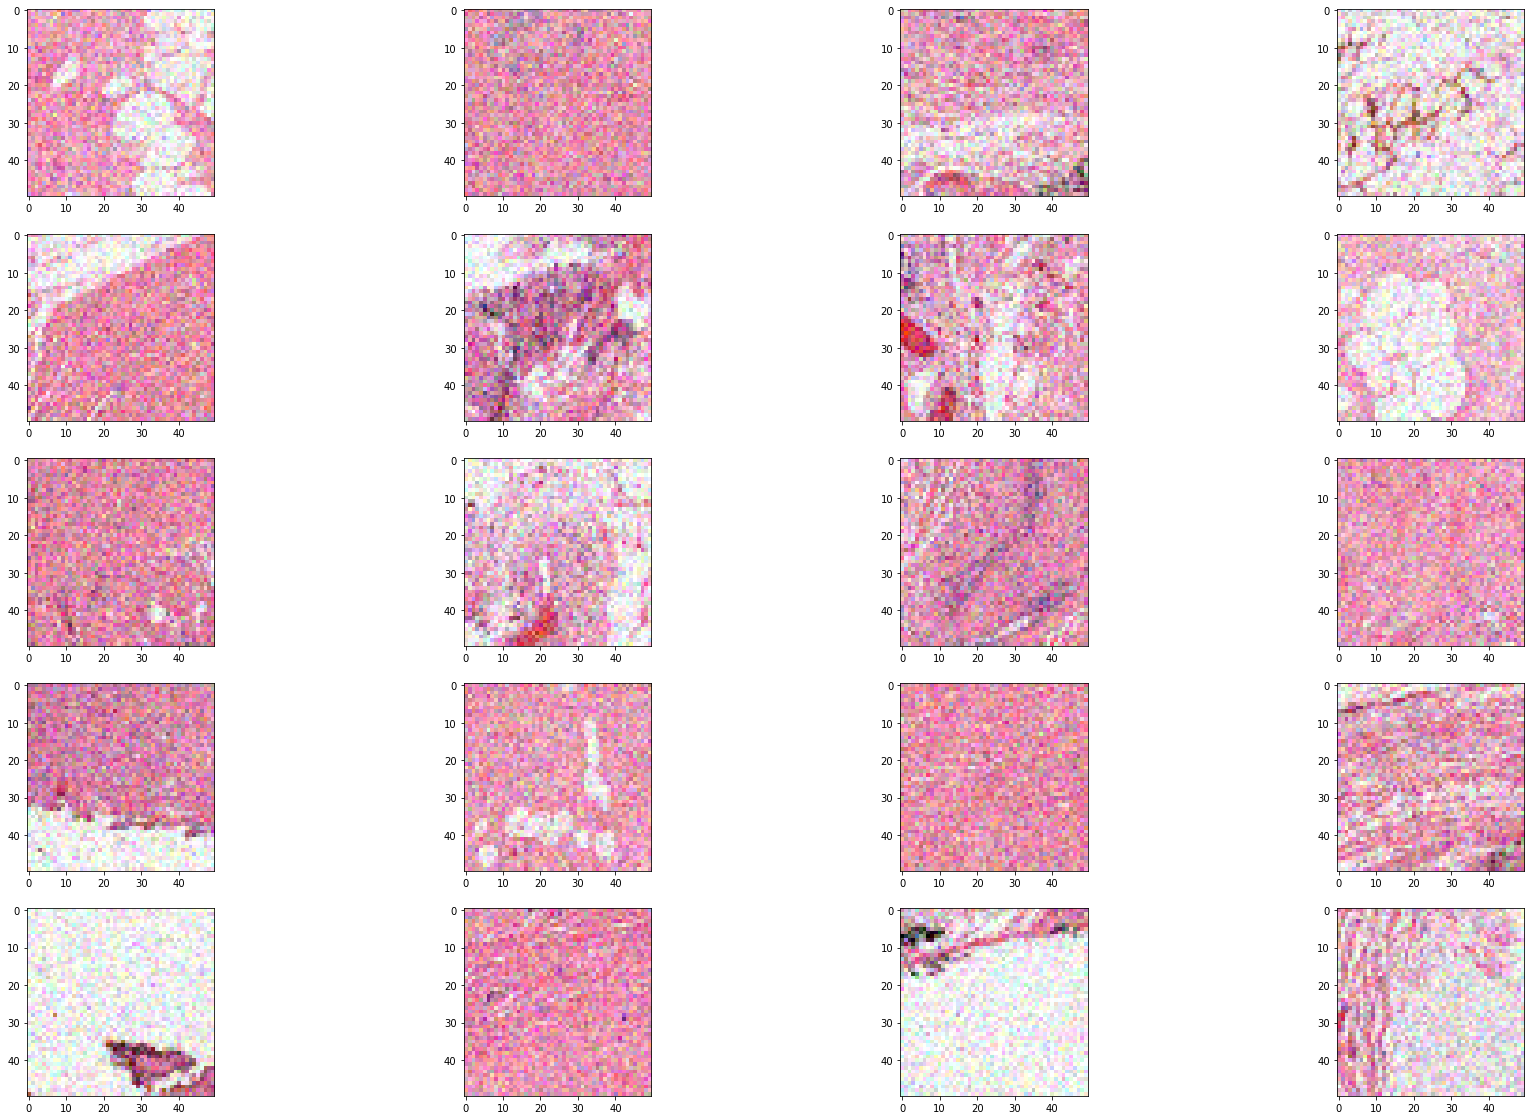

In [ ]:
fig, ax = plt.subplots(5,4,figsize=(30,20))
for n in range(5):
    for m in range(4):
        idx = neg_selection[m + 4*n]
        path =os.path.join(processd_lst_str,processd_data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

In [ ]:
data_processd_test_generation = ImageDataGenerator(rescale=1.0/255)
train_generation_processd = data_processd_test_generation.flow_from_directory("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\modeltst\\trainig\\", target_size=(50,50), batch_size=10,class_mode='categorical')
test_generation_processd = data_processd_test_generation.flow_from_directory("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\modeltst\\testing\\",target_size=(50,50),batch_size=10,class_mode='categorical')

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
my_model_im_processd =Sequential()
my_model_im_processd.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
my_model_im_processd.add(MaxPool2D(pool_size=(2,2)))


my_model_im_processd.add(Flatten())

my_model_im_processd.add(Dense(128,activation='relu'))

my_model_im_processd.add(Dense(2,activation='softmax'))

my_model_im_processd.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
my_model_im_processd.fit_generator(train_generation_processd,validation_data=test_generation_processd,epochs=60, verbose=1,callbacks=early_stop)

Epoch 1/60


C:\Users\Pham Van Dat\AppData\Local\Temp\ipykernel_1424\1583461655.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  my_model_im_processd.fit_generator(train_generation_processd,validation_data=test_generation_processd,epochs=60, verbose=1,callbacks=early_stop)


180/180 [==============================] - 7s 41ms/step - loss: 0.6914 - accuracy: 0.5383 - val_loss: 0.6938 - val_accuracy: 0.5050
Epoch 2/60
180/180 [==============================] - 7s 41ms/step - loss: 0.7015 - accuracy: 0.5283 - val_loss: 0.6924 - val_accuracy: 0.5100
Epoch 3/60
180/180 [==============================] - 7s 41ms/step - loss: 0.6924 - accuracy: 0.5333 - val_loss: 0.6933 - val_accuracy: 0.4950
Epoch 4/60
180/180 [==============================] - 7s 39ms/step - loss: 0.6887 - accuracy: 0.5161 - val_loss: 0.6932 - val_accuracy: 0.4850


### Second: the normal images

In [ ]:
os.mkdir( "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\normal\\")
os.mkdir( "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\normal\\modeltst\\") 
os.mkdir( "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\normal\\modeltst\\trainig\\")
os.mkdir( "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\normal\\modeltst\\testing\\")
os.mkdir( "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\normal\\modeltst\\trainig\\zeros\\")
os.mkdir( "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\normal\\modeltst\\trainig\\ones\\")
os.mkdir( "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\normal\\modeltst\\testing\\zeros\\")
os.mkdir( "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\normal\\modeltst\\testing\\ones\\")

In [ ]:
df_0 = data[data['target'] == '0'].sample(600, random_state=101)
df_1 = data[data['target'] == '1'].sample(600, random_state=101)
test_data =pd.DataFrame(data)
test_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
test_y = test_data['target']
test_data_train, test_data_test = train_test_split(test_data, test_size=0.10, random_state=101, stratify=test_y)
sts_train = test_data_train.image_id
tst_test  = test_data_test.image_id
test_data.set_index('image_id', inplace=True)
for image in sts_train:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\normal\\modeltst\\trainig\\", label, fname)
    shutil.copyfile(src, dst)
for image in tst_test:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\normal\\modeltst\\testing\\", label, fname)
    shutil.copyfile(src, dst)    


ValueError: a must be greater than 0 unless no samples are taken

In [ ]:
data_normal_test_generation = ImageDataGenerator(rescale=1.0/255)
train_generation_normal = data_normal_test_generation.flow_from_directory("Desktop\\final_proj\\image_processing\\normal\\model_tst\\trainig", target_size=(50,50), batch_size=10,class_mode='categorical')
test_generation_normal = data_normal_test_generation.flow_from_directory("Desktop\\final_proj\\image_processing\\normal\\model_tst\\testing",target_size=(50,50),batch_size=10,class_mode='categorical')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
my_model_im_norm =Sequential()
my_model_im_norm.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
my_model_im_norm.add(MaxPool2D(pool_size=(2,2)))


my_model_im_norm.add(Flatten())

my_model_im_norm.add(Dense(128,activation='relu'))
my_model_im_norm.add(Dense(2,activation='softmax'))

my_model_im_norm.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
my_model_im_processd.fit_generator(train_generation_normal,validation_data=test_generation_normal,epochs=60, verbose=1,callbacks=early_stop)

C:\Users\zeado\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
1800/1800 [==============================] - 332s 184ms/step - loss: 0.4209 - accuracy: 0.8166 - val_loss: 0.5193 - val_accuracy: 0.7650
Epoch 2/60
1800/1800 [==============================] - 92s 51ms/step - loss: 0.4273 - accuracy: 0.8151 - val_loss: 0.4623 - val_accuracy: 0.7905
Epoch 3/60
1800/1800 [==============================] - 93s 52ms/step - loss: 0.3895 - accuracy: 0.8341 - val_loss: 0.4769 - val_accuracy: 0.7850
Epoch 4/60
1800/1800 [==============================] - 95s 53ms/step - loss: 0.3602 - accuracy: 0.8439 - val_loss: 0.5446 - val_accuracy: 0.7935


## conclusion : Normal images are the best in modeling 

> # Modeling

# Data Spliting & Generation

In [ ]:
y = data['target']
data_train, data_test = train_test_split(data, test_size=0.10, random_state=101, stratify=y)

In [ ]:
print(data_train.shape)
print(data_test.shape)

(5512, 3)
(613, 3)


In [ ]:
os.mkdir( "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\traindir\\" )
os.mkdir("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\testdir\\" )

In [ ]:
os.mkdir( "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\traindir\\zeros")
os.mkdir( "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\traindir\\ones")

os.mkdir( "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\testdir\\zeros\\")
os.mkdir( "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\testdir\\ones\\")


In [ ]:
train = data_train.image_id
test  = data_test.image_id

In [ ]:
for normal_image in all_rays_dir_lst :
    path        = all_rays_dir+'\\'+ normal_image
    img         = mpimg.imread( path ,0)
    noise_image = random_noise(img)
    fname       = normal_image
    new_path    = os.path.join("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\imageprocessing\\noiseimages\\",fname)
    mpimg.imsave(new_path, noise_image)

In [ ]:
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

processd_data['target'] = processd_data['image_id'].apply(extract_target)

processd_data.head(10)

,image_id,target
0,16534_idx5_x1001_y1001_class0.png,0
1,16534_idx5_x101_y101_class1.png,1
2,16534_idx5_x1051_y1151_class0.png,0
3,16534_idx5_x1101_y1101_class0.png,0
4,16534_idx5_x1101_y1151_class0.png,0
5,16534_idx5_x1201_y651_class0.png,0
6,16534_idx5_x1251_y651_class0.png,0
7,16534_idx5_x151_y101_class1.png,1
8,16534_idx5_x151_y201_class1.png,1
9,16534_idx5_x201_y101_class1.png,1


In [ ]:
df_0 = processd_data[processd_data['target'] == '0'].sample(1000, random_state=101)
df_1 = processd_data[processd_data['target'] == '1'].sample(1000, random_state=101)
test_data =pd.DataFrame(data)
test_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
test_y = test_data['target']
test_data_train, test_data_test = train_test_split(test_data, test_size=0.10, random_state=101, stratify=test_y)
sts_train = test_data_train.image_id
tst_test  = test_data_test.image_id
test_data.set_index('image_id', inplace=True)
for image in sts_train:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
        src = os.path.join(all_rays_dir, fname)
    dst = os.path.join("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\traindir\\", label, fname)
    shutil.copyfile(src, dst)
  

IndentationError: expected an indented block (1472229543.py, line 22)

In [ ]:


for image in test:
    fname = image
    target = data.loc[image,'target']
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\traindir\\", label, fname)
    shutil.copyfile(src, dst)


In [ ]:
df_0 = processd_data[processd_data['target'] == '0'].sample(1000, random_state=101)
df_1 = processd_data[processd_data['target'] == '1'].sample(1000, random_state=101)
test_data =pd.DataFrame(data)
test_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
test_y = test_data['target']
test_data_train, test_data_test = train_test_split(test_data, test_size=0.10, random_state=101, stratify=test_y)
sts_train = test_data_train.image_id
tst_test  = test_data_test.image_id
test_data.set_index('image_id', inplace=True)

for image in test:
    fname = image
    target = data.loc[image,'target']
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\testdir\\", label, fname)
    shutil.copyfile(src, dst)


In [ ]:
print('non-IDC train      =',len(os.listdir("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\traindir\\zeros")))
print('IDC train          =',len(os.listdir("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\traindir\\ones")))
print('non-IDC validation =',len(os.listdir("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\testdir\\zeros\\")))
print('IDC validation     =',len(os.listdir("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\testdir\\ones\\")))

non-IDC train      = 6125
IDC train          = 900
non-IDC validation = 613
IDC validation     = 613


In [ ]:
data_generation = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generation = data_generation.flow_from_directory(
                                        "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\traindir\\",
                                        target_size=(25,25),
                                        batch_size=10,
                                        class_mode='categorical')
test_generation = data_generation.flow_from_directory(
                                       "C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\testdir\\",
                                        target_size=(25,25),
                                        batch_size=10,
                                        class_mode='categorical')



Found 7025 images belonging to 2 classes.
Found 1226 images belonging to 2 classes.


># Model design

In [ ]:
my_model =Sequential()
my_model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(25,25,3),activation='relu'))
my_model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(25,25,3),activation='relu'))
my_model.add(MaxPool2D(pool_size=(2,2)))
my_model.add(Dropout(.3))

my_model.add(Flatten())

my_model.add(Dense(256,activation='relu'))

my_model.add(Dense(2,activation='softmax'))

my_model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [ ]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        1568      
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 9, 9, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 2592)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               663808    
                                                      

In [ ]:
my_model.fit_generator(train_generation,validation_data=test_generation,epochs=60, verbose=1,callbacks=early_stop)

C:\Users\Pham Van Dat\AppData\Local\Temp\ipykernel_1424\120394343.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  my_model.fit_generator(train_generation,validation_data=test_generation,epochs=60, verbose=1,callbacks=early_stop)


Epoch 1/60
703/703 [==============================] - 66s 91ms/step - loss: 0.3854 - accuracy: 0.8710 - val_loss: 1.1520 - val_accuracy: 0.5000
Epoch 2/60
703/703 [==============================] - 28s 39ms/step - loss: 0.3793 - accuracy: 0.8719 - val_loss: 1.0205 - val_accuracy: 0.5000
Epoch 3/60
703/703 [==============================] - 27s 39ms/step - loss: 0.3725 - accuracy: 0.8719 - val_loss: 0.9276 - val_accuracy: 0.5000
Epoch 4/60
703/703 [==============================] - 27s 38ms/step - loss: 0.3706 - accuracy: 0.8719 - val_loss: 1.3968 - val_accuracy: 0.5000
Epoch 5/60
703/703 [==============================] - 30s 43ms/step - loss: 0.3654 - accuracy: 0.8717 - val_loss: 1.2060 - val_accuracy: 0.5000


># Outputs


In [ ]:
losse = pd.DataFrame(my_model.history.history)
losse.head()

,loss,accuracy,val_loss,val_accuracy
0,0.385449,0.871032,1.151993,0.5
1,0.379273,0.871886,1.020489,0.5
2,0.372451,0.871886,0.927614,0.5
3,0.370558,0.871886,1.396766,0.5
4,0.365409,0.871744,1.206040,0.5


<AxesSubplot:>

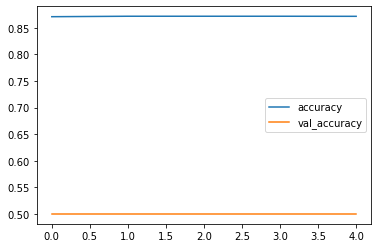

In [ ]:
losse[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

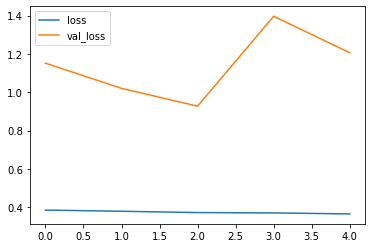

In [ ]:
losse[['loss','val_loss']].plot()


In [ ]:
val_loss, val_acc = \
my_model.evaluate_generator(test_generation)

print('val_loss:', val_loss)
print('val_acc:', val_acc)

C:\Users\Pham Van Dat\AppData\Local\Temp\ipykernel_1424\3377107130.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  my_model.evaluate_generator(test_generation)


val_loss: 1.206039309501648
val_acc: 0.5


## model results :

> # Save &Loaded Model

In [ ]:
model_json = my_model.to_json()

In [ ]:
with open( "C:\\Users\\Pham Van Dat\\Downloads\\breast-cancer-detection-using-cnn-DL--main\\breast-cancer-detection-using-cnn-DL--main\\model.json\\", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
my_model.save_weights("C:\\Users\\Pham Van Dat\\Downloads\\breast-cancer-detection-using-cnn-DL--main\\breast-cancer-detection-using-cnn-DL--main\\\\GUI\\model.h5\\")
print("Saved model to disk")

OSError: [Errno 22] Invalid argument: 'C:\\Users\\Pham Van Dat\\Downloads\\breast-cancer-detection-using-cnn-DL--main\\breast-cancer-detection-using-cnn-DL--main\\model.json\\'

In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


NameError: name 'model_from_json' is not defined

> # APIs &  Web Localization

- we will use this class to connect the web app to the model

In [ ]:
class Api_service :
    def __init__(self,img_file_path):
        self.img_file_path = img_file_path
    def prediction_function(self) :
        predict_generation = data_generation.flow_from_directory(
                                            self.img_file_path,
                                            target_size=(25,25),
                                            batch_size=10,
                                            class_mode='categorical')

        prediction = loaded_model.predict_generator(predict_generation)
        has_cancer = 'The percentage of cancer : '+ str(round(prediction[0][1]*100,2)) + "%"
        has_no_cancer='Percentage of no cancer : ' + str(round(prediction[0][0]*100,2)) + '%'
        return has_cancer,has_no_cancer 


In [ ]:
prediction = Api_service("C:\\Users\\Pham Van Dat\\Desktop\\finalproj\\predict\\")
x,y        = prediction.prediction_function()
print(x)
print(y)

Found 1127 images belonging to 1 classes.


NameError: name 'loaded_model' is not defined

#  *Finally we have finished*